# Convex Hull

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch
%matplotlib inline

In [2]:
with open('C:\\Users\\marwane\\Documents\\Data Science\\events_19769.json',encoding="utf-8") as data:
    events = json.load(data)

In [3]:
def lineup(file):     
    
    players = []

    for i in file:        
        players.append(i['player']['name'])
       
    
    return players

In [4]:
lineup = lineup(events[0]['tactics']['lineup'])

In [5]:
passes = []
c = 0
for i in events:
    if 'pass' in i.keys():
        passes.append(i)
        c=c+1

c

855

In [6]:
successful_passes = []
c = 0
for i in passes:
    if ('recipient' in i['pass'].keys()) and (i['team']['id'] == 965):
        successful_passes.append(i)
            #print('BOUM')
            
        c = c + 1
        
c

400

### Pass connection dataframe

In [7]:
id_players = []
players = []
x_starts = []
y_starts = []
id_recipients = []
recipients = []
x_ends = []
y_ends = []

for i in successful_passes:
    id_players.append(i['player']['id'])    
    players.append(i['player']['name'])
    x_starts.append(i['location'][0])
    y_starts.append(i['location'][1])
        

In [8]:
network = {'Player id':id_players,'Player':players,'X start':x_starts,'Y start':y_starts}
    

In [9]:
df = pd.DataFrame(network)

### Average position per player

In [10]:
mean_pos = df.groupby(['Player'],as_index=False).mean()
mean_pos

,Player,Player id,X start,Y start
0,Aileen Whelan,16374,74.724138,25.379310
1,Chloe Peplow,16397,53.432432,39.621622
2,Danielle Buet,20034,58.928571,36.428571
3,Ellie Brazil,16393,77.782609,64.913043
4,Iniabasi Anefiok Umotong,16378,73.625000,35.687500
5,Jodie Brett,16379,71.000000,32.588235
6,Kayleigh Green,16400,68.200000,57.500000
7,Kirsty Barton,19414,52.910448,73.402985
8,Laura Rafferty,16394,37.431818,54.181818
9,Marie Hourihan,19419,10.259259,42.074074


**Prepare data to convert into a convex hull object**

In [11]:
# Convex Hull Library
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [12]:
xs = mean_pos['X start'].to_numpy()
ys = mean_pos['Y start'].to_numpy()
# Data needs to be formatted into a numpy object
points = np.vstack((xs,ys)).T
points

array([[74.72413793, 25.37931034],
       [53.43243243, 39.62162162],
       [58.92857143, 36.42857143],
       [77.7826087 , 64.91304348],
       [73.625     , 35.6875    ],
       [71.        , 32.58823529],
       [68.2       , 57.5       ],
       [52.91044776, 73.40298507],
       [37.43181818, 54.18181818],
       [10.25925926, 42.07407407],
       [59.56818182, 12.90909091],
       [40.80952381, 25.16666667]])

In [13]:
hull = ConvexHull(points)

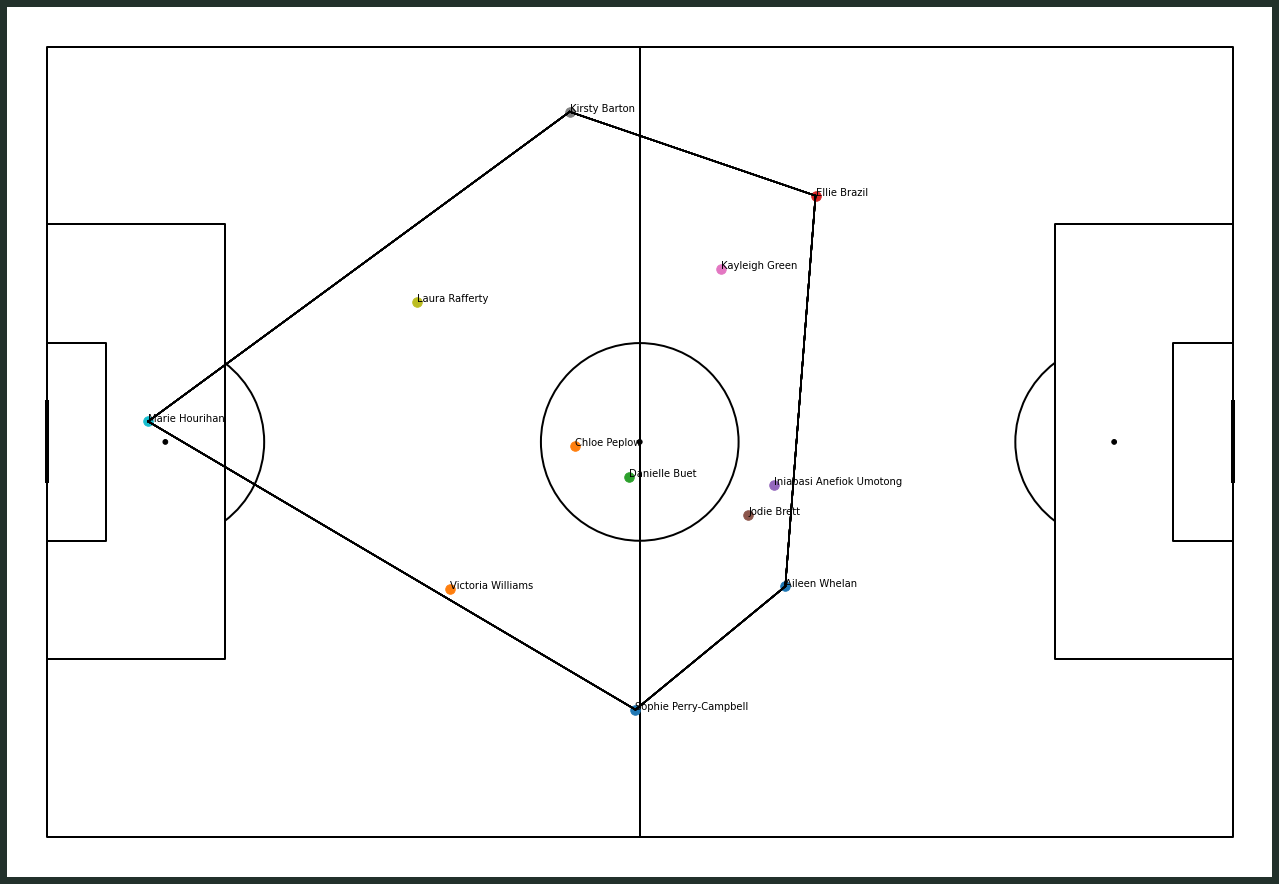

In [14]:


arrow_shift = 1 ##Units by which the arrow moves from its original position
shrink_val = 1.5

# DRawing the plot
fig,ax = plt.subplots(figsize=(28,16))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Drawing the pitch over the plot
pitch = Pitch(pitch_color='white',line_color='black',stripe=False)
pitch.draw(ax=ax)

#Invert Y axis
plt.gca().invert_yaxis()


    
#for i,row in mean_passes.iterrows():
#        ax.annotate("",xy=(row['X start'],row['Y start']),xytext=(row['X end'],row['Y end']),arrowprops=dict(arrowstyle="-|>", color="0.25"))

for i, row in mean_pos.iterrows():

    plt.scatter(row['X start'],row['Y start'],s=90)
    plt.annotate(row['Player'],(row['X start'],row['Y start']))
    
    for simplex in hull.simplices:
        plt.plot(points[simplex,0],points[simplex,1],'k-')
